# Tokenization

To see tokenization in action: https://tiktokenizer.vercel.app

In [2]:
"セラム 👋 hello in japanese"

'セラム 👋 hello in japanese'

In [3]:
#ord, karakterlerin unicode point karşılıklarını gösteriyor 
[ord(x) for x in "セラム 👋 hello in japanese"]

[12475,
 12521,
 12512,
 32,
 128075,
 32,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 106,
 97,
 112,
 97,
 110,
 101,
 115,
 101]

In [4]:
list("セラム 👋 hello in japanese".encode('utf-8'))

[227,
 130,
 187,
 227,
 131,
 169,
 227,
 131,
 160,
 32,
 240,
 159,
 145,
 139,
 32,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 106,
 97,
 112,
 97,
 110,
 101,
 115,
 101]

## Byte Pair Encoding Agorithm

En çok tekrar eden pairları bulup o pair yerine yeni bir karakter tanımlıyoruz ve bu şekilde ilerliyoruz. Bu processi ne kadar tekrar edeceğimiz bize kalmış, yani bir hyperparameter.

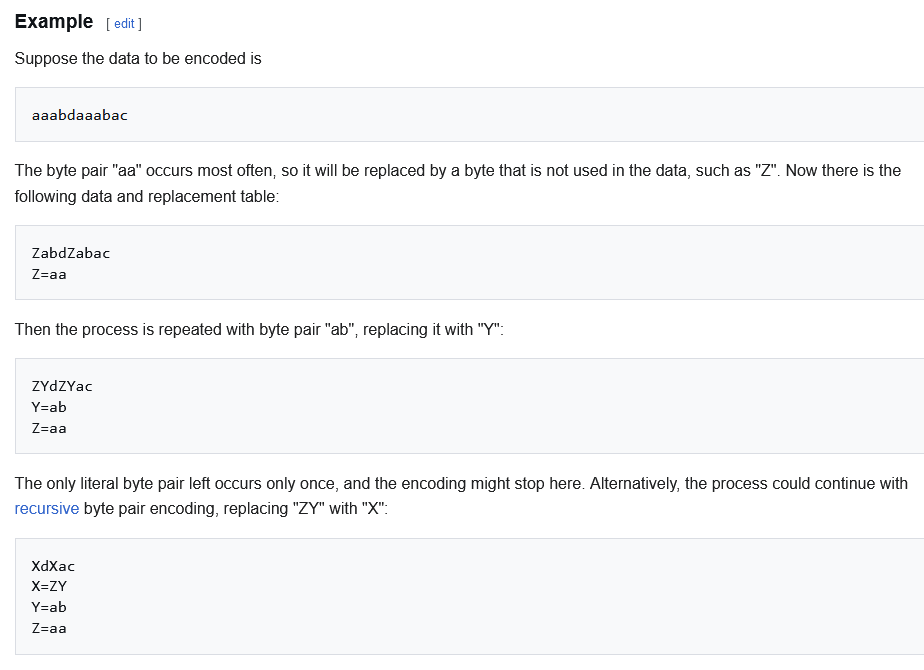

In [5]:
text = "Baking dough with meat has been around for millennia in the Middle East, and Turks, especially the Tatars, were known to prepare thin bread with a combination of meat and cheese for their meals. The exact manner of baking in this dish can be traced back to the 17th century, when Evliya Çelebi visited Damascus and recorded it in his famous travelogue “Seyahatname.” He wrote that he ate a “lahm-ı acînlı börek,” which came to be called the lahmacun we know and love today. Çelebi first gave it the name börek in reference to the thin layer of dough. Close to Damascus are the provinces of Şanlıurfa and Gaziantep, so the dish spread rather quickly simply due to the vicinity. While the dish remained a staple in region and was not too widely consumed outside the Ottoman empire, the concept was taken to the Americas in the 19th century. South Americans gave it a Latin spin and is now known as “sfiha” in Argentina and Brazil."
tokens = text.encode('utf-8') # byte a çeviriyoruz
tokens = list(map(int,tokens)) # byte listesini kolaylık olsun diye int listesine çeviriyoruz aralığı 0...255 
print('---')
print(text)
print('length:',len(text))
print('---')
print(tokens)
print('length:',len(tokens))

---
Baking dough with meat has been around for millennia in the Middle East, and Turks, especially the Tatars, were known to prepare thin bread with a combination of meat and cheese for their meals. The exact manner of baking in this dish can be traced back to the 17th century, when Evliya Çelebi visited Damascus and recorded it in his famous travelogue “Seyahatname.” He wrote that he ate a “lahm-ı acînlı börek,” which came to be called the lahmacun we know and love today. Çelebi first gave it the name börek in reference to the thin layer of dough. Close to Damascus are the provinces of Şanlıurfa and Gaziantep, so the dish spread rather quickly simply due to the vicinity. While the dish remained a staple in region and was not too widely consumed outside the Ottoman empire, the concept was taken to the Americas in the 19th century. South Americans gave it a Latin spin and is now known as “sfiha” in Argentina and Brazil.
length: 928
---
[66, 97, 107, 105, 110, 103, 32, 100, 111, 117, 103

In [6]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:] ): #2 şer 2 şer ardışık liste elementlerini iterate ediyoruz
        counts[pair] = counts.get(pair,0) + 1 # her bir çifttten kaç tane olduğunu sayıyoruz her gördüğümüzde 1 arttırarak
    return counts


stats = get_stats(tokens)
#print(stats)
print(sorted(((v,k) for k,v in stats.items()), reverse=True)) #en sık kullanılanları çiftleri sıralıyor

[(39, (101, 32)), (31, (32, 116)), (25, (116, 104)), (21, (110, 32)), (20, (104, 101)), (18, (105, 110)), (17, (100, 32)), (17, (32, 97)), (14, (114, 101)), (14, (97, 110)), (13, (115, 32)), (11, (32, 105)), (10, (116, 111)), (10, (116, 32)), (10, (104, 32)), (10, (32, 119)), (9, (111, 32)), (9, (110, 100)), (9, (109, 101)), (9, (97, 116)), (9, (32, 99)), (8, (101, 110)), (8, (97, 115)), (8, (97, 32)), (8, (32, 98)), (7, (108, 101)), (7, (105, 116)), (7, (105, 115)), (7, (101, 114)), (6, (226, 128)), (6, (114, 32)), (6, (111, 117)), (6, (109, 97)), (6, (104, 105)), (6, (101, 100)), (6, (99, 101)), (6, (97, 109)), (6, (44, 32)), (6, (32, 100)), (5, (110, 111)), (5, (105, 99)), (5, (101, 97)), (5, (99, 97)), (5, (97, 99)), (5, (46, 32)), (5, (32, 115)), (5, (32, 114)), (5, (32, 111)), (5, (32, 109)), (4, (121, 32)), (4, (118, 101)), (4, (117, 114)), (4, (116, 101)), (4, (114, 97)), (4, (111, 119)), (4, (111, 110)), (4, (111, 102)), (4, (110, 116)), (4, (110, 97)), (4, (108, 121)), (4, (1

In [7]:
chr(101), chr(32)

('e', ' ')

In [8]:
top_pair = max(stats, key=stats.get) # en sık kullanılan çifti buluyoruz
top_pair

(101, 32)

In [9]:
def merge(ids, pair, idx): # ids listesindeki verilen pair'i çıkarıp yerine idx'i koyuyor
    newids = []
    i = 0

    while i < len(ids):
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1
    return newids

print(merge([5,6,6,7,9,1], (6,7), 99)) 

tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print('length:', len(tokens2))

[5, 6, 99, 9, 1]
[66, 97, 107, 105, 110, 103, 32, 100, 111, 117, 103, 104, 32, 119, 105, 116, 104, 32, 109, 101, 97, 116, 32, 104, 97, 115, 32, 98, 101, 101, 110, 32, 97, 114, 111, 117, 110, 100, 32, 102, 111, 114, 32, 109, 105, 108, 108, 101, 110, 110, 105, 97, 32, 105, 110, 32, 116, 104, 256, 77, 105, 100, 100, 108, 256, 69, 97, 115, 116, 44, 32, 97, 110, 100, 32, 84, 117, 114, 107, 115, 44, 32, 101, 115, 112, 101, 99, 105, 97, 108, 108, 121, 32, 116, 104, 256, 84, 97, 116, 97, 114, 115, 44, 32, 119, 101, 114, 256, 107, 110, 111, 119, 110, 32, 116, 111, 32, 112, 114, 101, 112, 97, 114, 256, 116, 104, 105, 110, 32, 98, 114, 101, 97, 100, 32, 119, 105, 116, 104, 32, 97, 32, 99, 111, 109, 98, 105, 110, 97, 116, 105, 111, 110, 32, 111, 102, 32, 109, 101, 97, 116, 32, 97, 110, 100, 32, 99, 104, 101, 101, 115, 256, 102, 111, 114, 32, 116, 104, 101, 105, 114, 32, 109, 101, 97, 108, 115, 46, 32, 84, 104, 256, 101, 120, 97, 99, 116, 32, 109, 97, 110, 110, 101, 114, 32, 111, 102, 32, 98, 97, 1

In [10]:
text = """The origins Baking dough with meat has been around for millennia in the Middle East, and Turks, especially the Tatars, were known to prepare thin bread with a combination of meat and cheese for their meals. The exact manner of baking in this dish can be traced back to the 17th century, when Evliya Çelebi visited Damascus and recorded it in his famous travelogue “Seyahatname.” He wrote that he ate a “lahm-ı acînlı börek,” which came to be called the lahmacun we know and love today. Çelebi first gave it the name börek in reference to the thin layer of dough. Close to Damascus are the provinces of Şanlıurfa and Gaziantep, so the dish spread rather quickly simply due to the vicinity. While the dish remained a staple in region and was not too widely consumed outside the Ottoman empire, the concept was taken to the Americas in the 19th century. South Americans gave it a Latin spin and is now known as “sfiha” in Argentina and Brazil. Over the years, the dish spread throughout Turkey, and in the 1960s it became so popular long queues could be seen in cities throughout the country, as people flocked to try out this southeastern specialty. While Armenians claim lahmacun as their own national dish, within Turkey there is another debate between Gaziantep and Şanlıurfa on where this dish originated. The fued has gone so far that regions have applied to the Turkish Patent and Trademark Office for a patent, and both have received one. Şanlıurfa applied first move in 2013 and receiving its patent in 2018, while Gaziantep applied and received one in 2017. Etymology Lahmacun comes from the Arabic “lahm” meaning meat and “macun” meaning paste. This “meat paste” refers to the meat that gets finely chopped with the veggies, almost into a paste, and spread onto the dough. Alternative spellings are “lamejun,” “lahmajin” and “lahmajun.”   Lahmacun - The classic Turkish pizza Lahmacun - the classic Turkish pizza Making this would ideally require a stone oven, but there are ways to make it work at home as well. Ingredients For the dough     350 gr flour     1 tsp instant/dry yeast     1½ tsp salt     200 ml warm water     1 tbsp olive oil For the meat paste     350 gr minced meat, preferably beef or lamb     1-2 onions     4-5 cloves of garlic     ½ bundle of parsley     1-2 tomatoes     1 pepper     1 tbsp pepper taste     1 tbsp tomato paste     salt, black pepper, sweet red pepper, cumin, to taste Topping     lemon juice     parsley Instructions     To prepare the dough, add all the ingredients, making sure that the water is warm but not boiling. Knead the dough until it is no longer sticky and leave it to proof a warm place for about an hour.     For the meat paste, you’ll want to chop all the ingredients as finely as possible. You can also grate them as well. Add the vegetables to the meat and knead them together with seasonings of your choice. Preheat the oven to 200 degrees Celsius on grill mode.     After the dough has risen, separate the dough into about six pieces, or more depending if you would like smaller-sized lahmacun. Roll the dough out as thinly as possible and spread some of the meat paste carefully onto the dough making sure not to tear the dough. First cook the lahmacun on a non-stick pan until the dough gets some color, then put in in the oven for 10 minutes or until the crust turns to a golden-brown color.     Remove the lahmacun from the oven and fold it in half. Covering it with a cloth and letting resting for a bit before to cool off. The other lahmacun can be stacked on top of each other in the same manner and kept under the cloth. Once all have been baked, enjoy the lahmacun with lemon juice and additional parsley folded inside. Notes Tip Many people like to add many more vegetables to their lahmacun such as lettuce and tomatoes. Bibliography (1) Ana Sortun, “Spice: Flavors of the Eastern Mediterranean”, (2) Gil Marks, “Encylopedia of Jewish Food”, 2010 (3) Deniz Gürsoy, “Tarihin süzgecinde mutfak kültürümüz”, 2013 (4) Ayfer Bartu, “Rethinking Heritage Politics in a Global Context”, 2001 (5) https://www.ci.gov.tr/cografi-isaretler/detay/38097"""

tokens = text.encode('utf-8')
tokens = list(map(int, tokens))

In [11]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:] ): #2 şer 2 şer ardışık liste elementlerini iterate ediyoruz
        counts[pair] = counts.get(pair,0) + 1 # her bir çifttten kaç tane olduğunu sayıyoruz her gördüğümüzde 1 arttırarak
    return counts

def merge(ids, pair, idx): # ids listesindeki verilen pair'i çıkarıp yerine idx'i koyuyor
    newids = []
    i = 0

    while i < len(ids):
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1
    return newids

# ---

vocab_size = 276 # en son oluşacak vocabulary size
num_merges = vocab_size - 256 # kaç kere merge işlemi yapacağımız, burada 20 merge
ids = list(tokens) # tokes'ı kopyalama, orjinal liste bozulmasın diye

merges = {} # (int, int) -> int
for i in range(num_merges):
    stats = get_stats(ids)
    pair = max(stats, key=stats.get)
    idx = 256 + i
    print(f"merging {pair} into new token {idx}")
    ids = merge(ids, pair, idx)
    merges[pair] = idx





merging (101, 32) into new token 256
merging (32, 116) into new token 257
merging (32, 32) into new token 258
merging (105, 110) into new token 259
merging (32, 97) into new token 260
merging (257, 104) into new token 261
merging (100, 32) into new token 262
merging (261, 256) into new token 263
merging (115, 32) into new token 264
merging (101, 114) into new token 265
merging (111, 117) into new token 266
merging (97, 116) into new token 267
merging (116, 104) into new token 268
merging (114, 101) into new token 269
merging (110, 32) into new token 270
merging (226, 128) into new token 271
merging (115, 116) into new token 272
merging (109, 97) into new token 273
merging (110, 262) into new token 274
merging (44, 32) into new token 275


In [12]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 4194
ids length: 3286
compression ratio: 1.28X


Tokenizer, LLM'den tamamen ayrı. Tokenizer'ın LLM'den ayrı bir training seti var, bu training sette BPE algoritmasıyla training yapılıyor. Tokenizer eğitimi bittikten ve mergeler yapıldıktan sonra raw text ve tokenlar arasında geçiş yapabiliyoruz ve Tokenizer raw text ile tokenlar arasında bir çeviri layerı olarak görev yapıyor. LLM sadece tokenlar üzerinden ilerliyor ve raw text görmüyor.

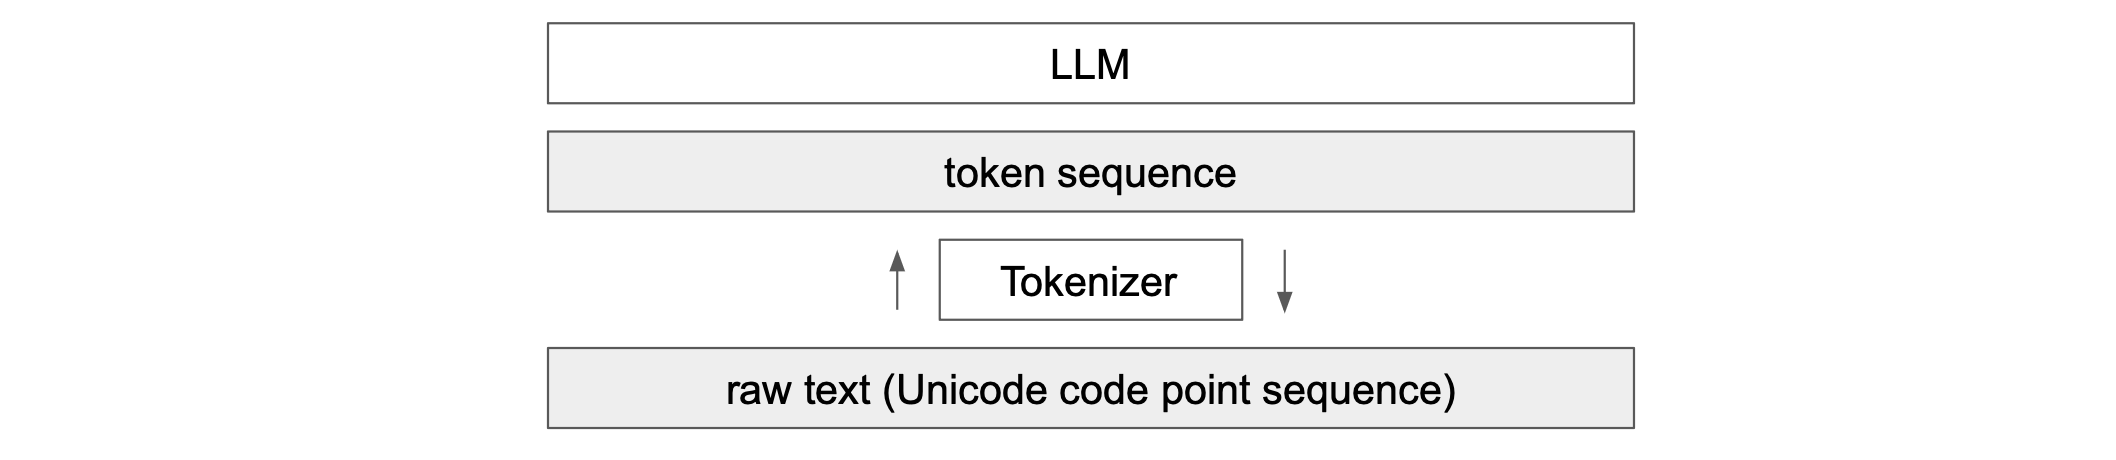

## Decoding

In [13]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids): # verilen ids listesini texte çeviriyoruz
    tokens = b"".join([vocab[idx] for idx in ids])
    text = tokens.decode('utf-8', errors='replace') # utf-8 start sekansına uysun diye errors='replace' ekliyoruz
    return text

print(decode([128]))

�


## Encoding

In [14]:
def encode(text):
    tokens = list(text.encode('utf-8'))
    while len(tokens) >= 2:
        stats = get_stats(tokens)
        pair = min(stats, key= lambda p: merges.get(p, float('inf')))
        if pair not in merges:
            break # başka hiç bir şeyi merge edemediğimiz durumda döngüden çıkıyoruz
        idx = merges[pair]
        tokens = merge(tokens, pair, idx)
    return tokens

print(encode("hello world!"))
print(encode(""))

[104, 101, 108, 108, 111, 32, 119, 111, 114, 108, 100, 33]
[]


In [15]:
print(decode(encode("hello world!")))

hello world!


In [16]:
text2 = decode(encode(text))
print(text2 == text)

True


In [17]:
valtext = "Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes thousands of emoji, with the continued development thereof conducted by the Consortium as a part of the standard.[4] Moreover, the widespread adoption of Unicode was in large part responsible for the initial popularization of emoji outside of Japan. Unicode is ultimately capable of encoding more than 1.1 million characters."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


## Forced Splits using regex patterns (GPT Series)

In [18]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hello've world123 how's are you!!!?"))

['Hello', "'ve", ' world', '123', ' how', "'s", ' are', ' you', '!!!?']


In [19]:
example = """
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
"""
print(re.findall(gpt2pat, example))

['\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n']


In [21]:
import tiktoken

#GPT-2 tokenizer (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!"))

#GPT-4 tokenizer (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!"))

[220, 220, 220, 23748, 995, 0]
[262, 24748, 1917, 0]


In [24]:
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges"


## Special Tokens

In [25]:
len(encoder) #256 raw byte tokens, 50k merges, 1 special token 50k + 256 + 1 (special token) = 50257

50257

In [27]:
encoder['<|endoftext|>'] #special token

50256

In [29]:
import sentencepiece as spm

# write a toy.txt file with some random text
with open("toy.txt", "w", encoding="utf-8") as f:
  f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

In [30]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="toy.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)


In [31]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5

In [32]:
ids = sp.encode("hello 안녕하세요")
print(ids)

[362, 378, 361, 372, 358, 362, 239, 152, 139, 238, 136, 152, 240, 152, 155, 239, 135, 187, 239, 157, 151]


In [33]:
print([sp.id_to_piece(idx) for idx in ids])

['▁', 'h', 'e', 'l', 'lo', '▁', '<0xEC>', '<0x95>', '<0x88>', '<0xEB>', '<0x85>', '<0x95>', '<0xED>', '<0x95>', '<0x98>', '<0xEC>', '<0x84>', '<0xB8>', '<0xEC>', '<0x9A>', '<0x94>']
